![QuantConnect Logo](https://cdn.quantconnect.com/web/i/logo-small.png)
## Welcome to The QuantConnect Research Page
#### Refer to this page for documentation https://www.quantconnect.com/docs#Introduction-to-Jupyter
#### Contribute to this template file https://github.com/QuantConnect/Lean/blob/master/Jupyter/BasicQuantBookTemplate.ipynb

## QuantBook Basics

### Start QuantBook
- Add the references and imports
- Create a QuantBook instance

In [1]:
%matplotlib inline
# Imports
from clr import AddReference
AddReference("System")
AddReference("QuantConnect.Common")
AddReference("QuantConnect.Jupyter")
AddReference("QuantConnect.Indicators")
from System import *
from QuantConnect import *
from QuantConnect.Data.Custom import *
from QuantConnect.Data.Market import TradeBar, QuoteBar
from QuantConnect.Jupyter import *
from QuantConnect.Indicators import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd

# Create an instance
qb = QuantBook()

In [2]:
qb

### Selecting Asset Data
Checkout the QuantConnect [docs](https://www.quantconnect.com/docs#Initializing-Algorithms-Selecting-Asset-Data) to learn how to select asset data.

In [3]:
spx500 = qb.AddEquity("SPX500USD")
spy = qb.AddEquity("SPY")
eur = qb.AddForex("EURUSD")
btc = qb.AddCrypto("BTCUSD")
fxv = qb.AddData[FxcmVolume]("EURUSD_Vol", Resolution.Hour)

In [24]:

us30 = qb.AddCfd("US30USD")
us2000 = qb.AddCfd("US2000USD")
xauusd = qb.AddCfd("XAUUSD")

### Historical Data Requests

We can use the QuantConnect API to make Historical Data Requests. The data will be presented as multi-index pandas.DataFrame where the first index is the Symbol.

For more information, please follow the [link](https://www.quantconnect.com/docs#Historical-Data-Historical-Data-Requests).

In [19]:
qb.Securities.Keys

In [6]:
eur.Symbol, us30.Symbol

(<QuantConnect.Symbol at 0x7f7fcbb30278>,
 <QuantConnect.Symbol at 0x7f7fcbb303c8>)

In [34]:
spx500 = qb.AddCfd("SPX500USD", Resolution.Hour)

In [6]:
# Gets historical data from the subscribed assets, the last 360 datapoints with daily resolution
h1 = qb.History(qb.Securities.Keys, datetime(2014,1,1), datetime.now(), Resolution.Hour)#Daily)

In [7]:
# Plot closing prices from "SPY" 
h1.index.levels[0]

Index(['EURUSD', 'SPX500USD'], dtype='object', name='symbol')

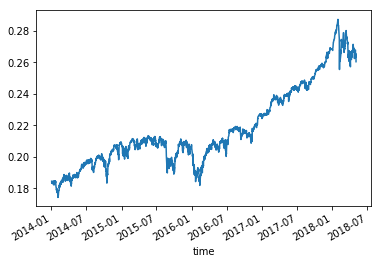

In [8]:
h1.loc["SPX500USD"]["high"].plot()

In [67]:
[sec.Value for sec in qb.Securities.Keys]

['XAUUSD',
 'US30',
 'EURUSD',
 'SPY',
 'US2000USD',
 'US2000',
 'US30USD',
 'SPX500USD',
 'SPX500',
 'EURUSD_VOL',
 'BTCUSD']

In [21]:
# Gets historical data from the subscribed assets, the last 360 datapoints with daily resolution
h1 = qb.History([xauusd.Symbol], datetime(2014,1,1), datetime.now(), Resolution.Daily) #Daily)
# Plot closing prices from "SPY" 
h1.index

Index([], dtype='object')

In [71]:
# Gets historical data from the subscribed assets, from the last 30 days with daily resolution
h2 = qb.History(qb.Securities.Keys, datetime(2001,1,1), datetime(2018,1,1), Resolution.Hour)

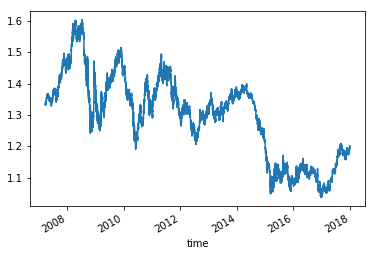

In [72]:
# Plot high prices from "EURUSD" 
h2.loc["EURUSD"]["high"].plot()

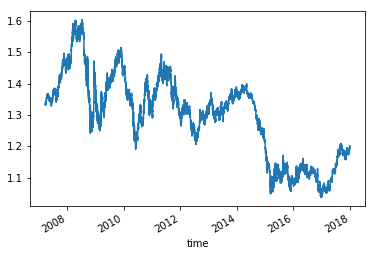

In [45]:
# Plot high prices from "EURUSD" 
h2.loc["EURUSD"]["high"].plot()

In [43]:
h2.shape

(50773, 13)

In [7]:
# Gets historical data from the subscribed assets, between two dates with daily resolution
h3 = qb.History([btc.Symbol], datetime(2014,1,1), datetime.now(), Resolution.Daily)

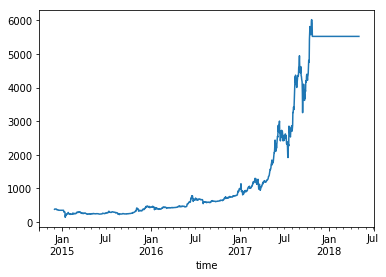

In [8]:
# Plot closing prices from "BTCUSD" 
h3.loc["BTCUSD"]["close"].plot()

In [9]:
# Only fetchs historical data from a desired symbol
h4 = qb.History([spy.Symbol], datetime(2014,1,1), datetime.now(), Resolution.Daily)
# or qb.History(["SPY"], 360, Resolution.Daily)

In [10]:
# Only fetchs historical data from a desired symbol
h5 = qb.History([eur.Symbol], datetime(2014,1,1), datetime.now(), Resolution.Daily)
# or qb.History(["EURUSD"], timedelta(30), Resolution.Daily)

In [25]:
# Fetchs custom data
h6 = qb.History([fxv.Symbol], datetime(2014,1,1), datetime.now(), Resolution.Daily)
#h6.loc[fxv.Symbol.Value]["volume"].plot()

In [27]:
h6.loc["EURUSD_VOL"]

KeyError: 'the label [EURUSD_VOL] is not in the [index]'

In [21]:
fxv.Symbol.Value

'EURUSD_VOL'

### Historical Options Data Requests
- Select the option data
- Sets the filter, otherwise the default will be used SetFilter(-1, 1, timedelta(0), timedelta(35))
- Get the OptionHistory, an object that has information about the historical options data

In [13]:
goog = qb.AddOption("GOOG")
goog.SetFilter(-2, 2, timedelta(0), timedelta(180))

In [28]:
option_history = qb.GetOptionHistory(goog.Symbol, datetime(2018, 1, 4))
print (option_history.GetStrikes())
print (option_history.GetExpiryDates())
h7 = option_history.GetAllData()

[]
[]


### Historical Future Data Requests
- Select the future data
- Sets the filter, otherwise the default will be used SetFilter(timedelta(0), timedelta(35))
- Get the FutureHistory, an object that has information about the historical future data

In [15]:
es = qb.AddFuture("ES")
es.SetFilter(timedelta(0), timedelta(180))

In [16]:
future_history = qb.GetFutureHistory(es.Symbol, datetime(2017, 1, 4))
print (future_history.GetExpiryDates())
h7 = future_history.GetAllData()

[]


### Get Fundamental Data

- *GetFundamental([symbol], selector, start_date = datetime(1998,1,1), end_date = datetime.now())*

We will get a pandas.DataFrame with fundamental data.

In [17]:
data = qb.GetFundamental(["AAPL","AIG","BAC","GOOG","IBM"], "ValuationRatios.PERatio")
data

,AAPL R735QTJ8XC9X,AIG R735QTJ8XC9X,GOOG,IBM R735QTJ8XC9X,NB R735QTJ8XC9X
2014-02-12,NaN,NaN,0,NaN,NaN
2014-02-28,13.012858,8.185855,NaN,12.394244,18.366667
2014-03-31,13.272502,8.225329,30.785444,12.884203,19.111111
2014-04-24,13.272502,NaN,30.785444,NaN,NaN
2014-04-29,NaN,NaN,NaN,12.884203,NaN
2014-04-30,NaN,8.738487,NaN,NaN,16.822222


### Indicators

We can easily get the indicator of a given symbol with QuantBook. 

For all indicators, please checkout QuantConnect Indicators [Reference Table](https://www.quantconnect.com/docs#Indicators-Reference-Table)

In [18]:
# Example with BB, it is a datapoint indicator
# Define the indicator
bb = BollingerBands(30, 2)

# Gets historical data of indicator
bbdf = qb.Indicator(bb, "SPY", 360, Resolution.Daily)

# drop undesired fields
bbdf = bbdf.drop('standarddeviation', 1)

# Plot
bbdf.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
# For EURUSD
bbdf = qb.Indicator(bb, "EURUSD", 360, Resolution.Daily)
bbdf = bbdf.drop('standarddeviation', 1)
bbdf.plot()

In [ ]:
# Example with ADX, it is a bar indicator
adx = AverageDirectionalIndex("adx", 14)
adxdf = qb.Indicator(adx, "SPY", 360, Resolution.Daily)
adxdf.plot()

In [ ]:
# For EURUSD
adxdf = qb.Indicator(adx, "EURUSD", 360, Resolution.Daily)
adxdf.plot()

In [ ]:
# Example with ADO, it is a tradebar indicator (requires volume in its calculation)
ado = AccumulationDistributionOscillator("ado", 5, 30)
adodf = qb.Indicator(ado, "SPY", 360, Resolution.Daily)
adodf.plot()

In [ ]:
# For EURUSD. 
# Uncomment to check that this SHOULD fail, since Forex is data type is not TradeBar.
# adodf = qb.Indicator(ado, "EURUSD", 360, Resolution.Daily)
# adodf.plot()

In [ ]:
# SMA cross:
symbol = "EURUSD"
# Get History 
hist = qb.History([symbol], 500, Resolution.Daily)
# Get the fast moving average
fast = qb.Indicator(SimpleMovingAverage(50), symbol, 500, Resolution.Daily)
# Get the fast moving average
slow = qb.Indicator(SimpleMovingAverage(200), symbol, 500, Resolution.Daily)

# Remove undesired columns and rename others 
fast = fast.drop('rollingsum', 1).rename(columns={'simplemovingaverage': 'fast'})
slow = slow.drop('rollingsum', 1).rename(columns={'simplemovingaverage': 'slow'})

# Concatenate the information and plot 
df = pd.concat([hist.loc[symbol]["close"], fast, slow], axis=1).dropna(axis=0)
df.plot()

In [ ]:
# Get indicator defining a lookback period in terms of timedelta
ema1 = qb.Indicator(ExponentialMovingAverage(50), "SPY", timedelta(100), Resolution.Daily)
# Get indicator defining a start and end date
ema2 = qb.Indicator(ExponentialMovingAverage(50), "SPY", datetime(2016,1,1), datetime(2016,10,1), Resolution.Daily)

ema = pd.concat([ema1, ema2], axis=1)
ema.plot()

In [ ]:
rsi = RelativeStrengthIndex(14)

# Selects which field we want to use in our indicator (default is Field.Close)
rsihi = qb.Indicator(rsi, "SPY", 360, Resolution.Daily, Field.High)
rsilo = qb.Indicator(rsi, "SPY", 360, Resolution.Daily, Field.Low)
rsihi = rsihi.rename(columns={'relativestrengthindex': 'high'})
rsilo = rsilo.rename(columns={'relativestrengthindex': 'low'})
rsi = pd.concat([rsihi['high'], rsilo['low']], axis=1)
rsi.plot()